In [10]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np
from scipy.stats import linregress
import plotly.figure_factory as ff

In [11]:
# Read CSV
csvpath = "output_data/census.csv"
census_df = pd.read_csv(csvpath,index_col="datapoint")
census_df["Zipcode"] = census_df["Zipcode"].astype("category")
census_df

,Year,Zipcode,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,Median Income,Median Rent,Median Home Value,County,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value
datapoint,,,,,,,,,,,,,,,,,
0,2012,48009,20153,18622,663,10031.0,489.0,797.0,767.0,0.0,100789.0,993.0,339600.0,Oakland,128472.019282,1265.740459,432875.589083
1,2013,48009,20241,18620,765,10138.0,553.0,704.0,669.0,0.0,98750.0,1070.0,347400.0,Oakland,124055.861168,1344.200217,436425.378933
2,2015,48009,20489,18864,587,10669.0,407.0,827.0,730.0,37.0,108135.0,1121.0,410700.0,Oakland,133518.897062,1384.146517,507108.808651
3,2017,48009,20836,19063,580,10795.0,393.0,914.0,726.0,92.0,114537.0,1223.0,467700.0,Oakland,136748.636321,1460.170794,558398.920937
4,2020,48009,21277,19011,688,10729.0,362.0,1001.0,790.0,114.0,126646.0,1498.0,538500.0,Oakland,143207.147803,1693.889325,608918.158424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2017,49548,32694,23495,3522,16310.0,963.0,6656.0,4210.0,932.0,45534.0,695.0,82200.0,Kent,54364.200269,829.778170,98140.669876
1246,2012,49548,30155,23134,3109,13743.0,1895.0,6416.0,4296.0,1162.0,39926.0,622.0,89700.0,Kent,50892.198969,792.840449,114337.280155
1247,2015,49548,30234,22081,3032,14715.0,1308.0,6056.0,3203.0,996.0,40895.0,648.0,78800.0,Kent,50494.800900,800.113241,97297.721261


In [12]:
# Create column in DF for ratios of White/Black population and poverty counts AND employed / unemployed
for i in census_df.index:
    census_df.at[i,"% Black Population"] = 100*(census_df.at[i,"Black Population"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% White Population"] = 100*(census_df.at[i,"White Population"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% Unemployed"]       = 100*(census_df.at[i,"Unemployed Count"] / census_df.at[i,"Total Population"])
    census_df.at[i, "% Black Poverty"]   = 100*(census_df.at[i,"Poverty Count - Black"] / census_df.at[i,"Poverty Count"])
    census_df.at[i, "% White Poverty"]   = 100*(census_df.at[i,"Poverty Count - White"] / census_df.at[i,"Poverty Count"])
census_df

,Year,Zipcode,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,...,Median Home Value,County,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
datapoint,,,,,,,,,,,,,,,,,,,,,
0,2012,48009,20153,18622,663,10031.0,489.0,797.0,767.0,0.0,...,339600.0,Oakland,128472.019282,1265.740459,432875.589083,3.289833,92.403116,2.426438,0.000000,96.235885
1,2013,48009,20241,18620,765,10138.0,553.0,704.0,669.0,0.0,...,347400.0,Oakland,124055.861168,1344.200217,436425.378933,3.779458,91.991502,2.732078,0.000000,95.028409
2,2015,48009,20489,18864,587,10669.0,407.0,827.0,730.0,37.0,...,410700.0,Oakland,133518.897062,1384.146517,507108.808651,2.864952,92.068915,1.986432,4.474002,88.270859
3,2017,48009,20836,19063,580,10795.0,393.0,914.0,726.0,92.0,...,467700.0,Oakland,136748.636321,1460.170794,558398.920937,2.783644,91.490689,1.886159,10.065646,79.431072
4,2020,48009,21277,19011,688,10729.0,362.0,1001.0,790.0,114.0,...,538500.0,Oakland,143207.147803,1693.889325,608918.158424,3.233539,89.350002,1.701368,11.388611,78.921079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2017,49548,32694,23495,3522,16310.0,963.0,6656.0,4210.0,932.0,...,82200.0,Kent,54364.200269,829.778170,98140.669876,10.772619,71.863339,2.945495,14.002404,63.251202
1246,2012,49548,30155,23134,3109,13743.0,1895.0,6416.0,4296.0,1162.0,...,89700.0,Kent,50892.198969,792.840449,114337.280155,10.310065,76.716962,6.284198,18.110973,66.957606
1247,2015,49548,30234,22081,3032,14715.0,1308.0,6056.0,3203.0,996.0,...,78800.0,Kent,50494.800900,800.113241,97297.721261,10.028445,73.033671,4.326255,16.446499,52.889696


In [15]:
# Create separate DFs for each county
oakland_data = pd.DataFrame(census_df.loc[census_df["County"] == "Oakland"])
kent_data = pd.DataFrame(census_df.loc[census_df["County"] == "Kent"])
saginaw_data = pd.DataFrame(census_df.loc[census_df["County"] == "Saginaw"])

# Ensure zipcodes are categorical
oakland_data["Zipcode"] = oakland_data["Zipcode"].astype("object")
kent_data["Zipcode"] = kent_data["Zipcode"].astype("object")
saginaw_data["Zipcode"] = saginaw_data["Zipcode"].astype("object")

# Export separate dataframes for use in Map Plots ipynb 
oakland_data.to_csv("output_data/oakland_data.csv",index_label="datapoint")
kent_data.to_csv("output_data/kent_data.csv",index_label="datapoint")
saginaw_data.to_csv("output_data/saginaw_data.csv",index_label="datapoint")

print(oakland_data["Zipcode"].unique)

<bound method Series.unique of datapoint
0      48009
1      48009
2      48009
3      48009
4      48009
       ...  
715    48462
716    48462
717    48462
718    48462
719    48462
Name: Zipcode, Length: 660, dtype: object>


In [16]:
# Create dataframes grouped by zipcode for zipcode analysis
oakland_grouped = oakland_data.groupby("Zipcode").median()
kent_grouped = kent_data.groupby("Zipcode").median()
saginaw_grouped = saginaw_data.groupby("Zipcode").median()

# Income in Each County, by Zipcode **Jonathan**

In [ ]:
# Create scatter plot(s) for Income in each county


In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph


# Home Values in Each County, by Zipcode **Tamica**

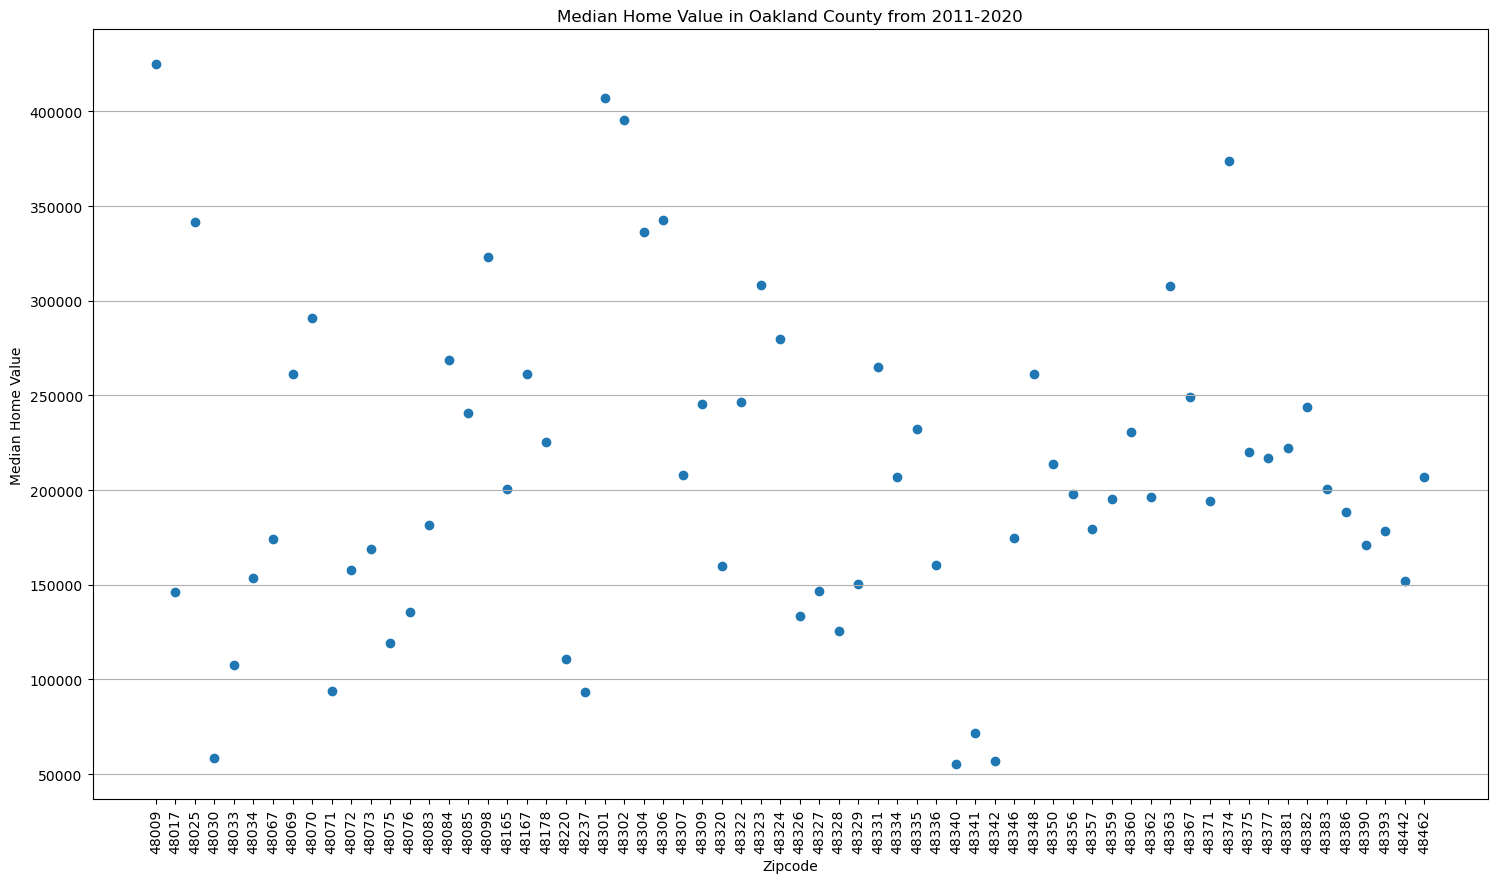

<Figure size 640x480 with 0 Axes>

In [24]:
# Create scatter plot(s) for Home Values in each county
# Oakland


fig = plt.figure(figsize = (18,10))
xaxis = np.arange(0,len(oakland_grouped.index))
label = (oakland_grouped.index.tolist())
line1 = plt.scatter(xaxis,oakland_grouped["Median Home Value"],label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)

plt.xlabel("Zipcode")
plt.ylabel("Median Home Value")
plt.title("Median Home Value in Oakland County from 2011-2020")


plt.xticks(rotation = 90);
plt.grid(axis = 'y')

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/oakland2_cty_home_values.png")


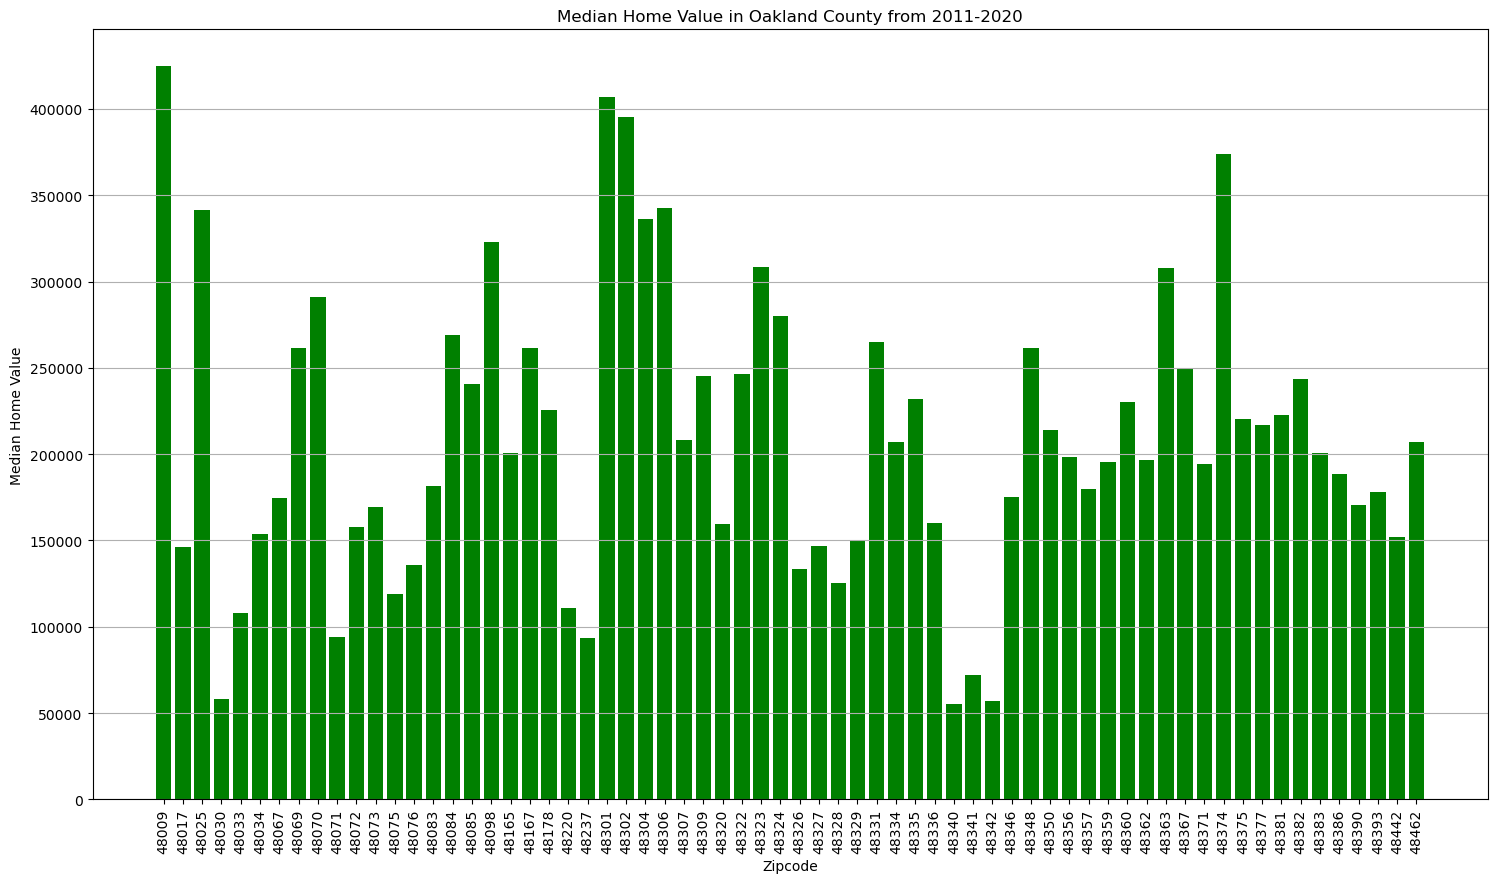

<Figure size 640x480 with 0 Axes>

In [17]:
# Create graph(s) for Home Values in each county
# Oakland

fig = plt.figure(figsize = (18,10))
xaxis = np.arange(0,len(oakland_grouped.index))
label = (oakland_grouped.index.tolist())
line1 = plt.bar(xaxis,oakland_grouped["Median Home Value"],color='g',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)

plt.xlabel("Zipcode")
plt.ylabel("Median Home Value")
plt.title("Median Home Value in Oakland County from 2011-2020")

plt.xticks(rotation = 90);
plt.grid(axis = 'y')

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/oakland_cty_home_values.png")

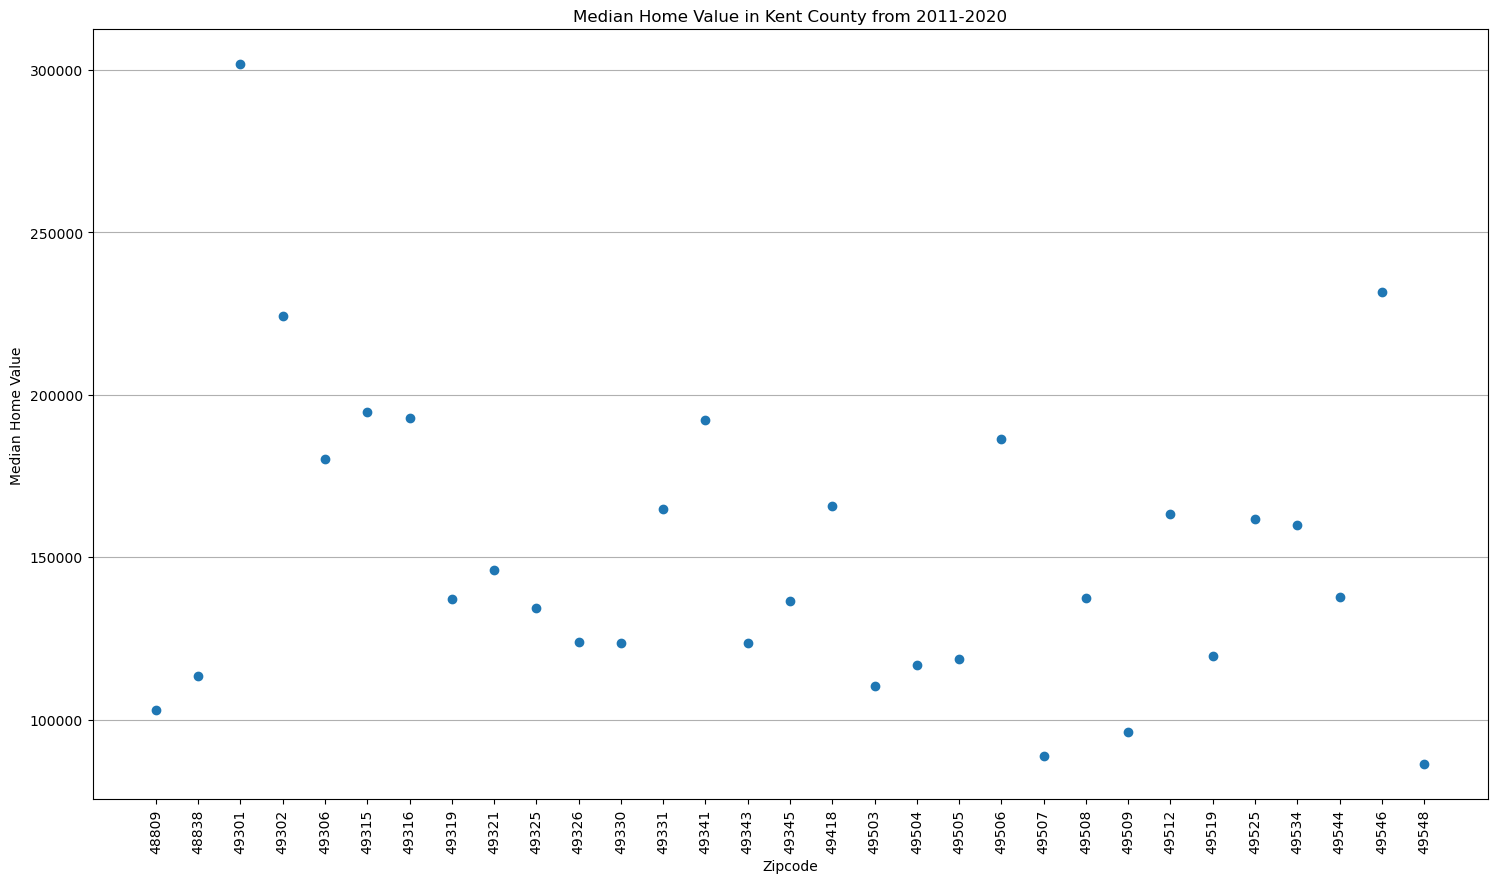

<Figure size 640x480 with 0 Axes>

In [25]:
# Create scatter plot(s) for Home Values in each county
# Kent


fig = plt.figure(figsize = (18,10))
xaxis = np.arange(0,len(kent_grouped.index))
label = (kent_grouped.index.tolist())
line1 = plt.scatter(xaxis,kent_grouped["Median Home Value"],label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)

plt.xlabel("Zipcode")
plt.ylabel("Median Home Value")
plt.title("Median Home Value in Kent County from 2011-2020")


plt.xticks(rotation = 90);
plt.grid(axis = 'y')

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/kent2_cty_home_values.png")

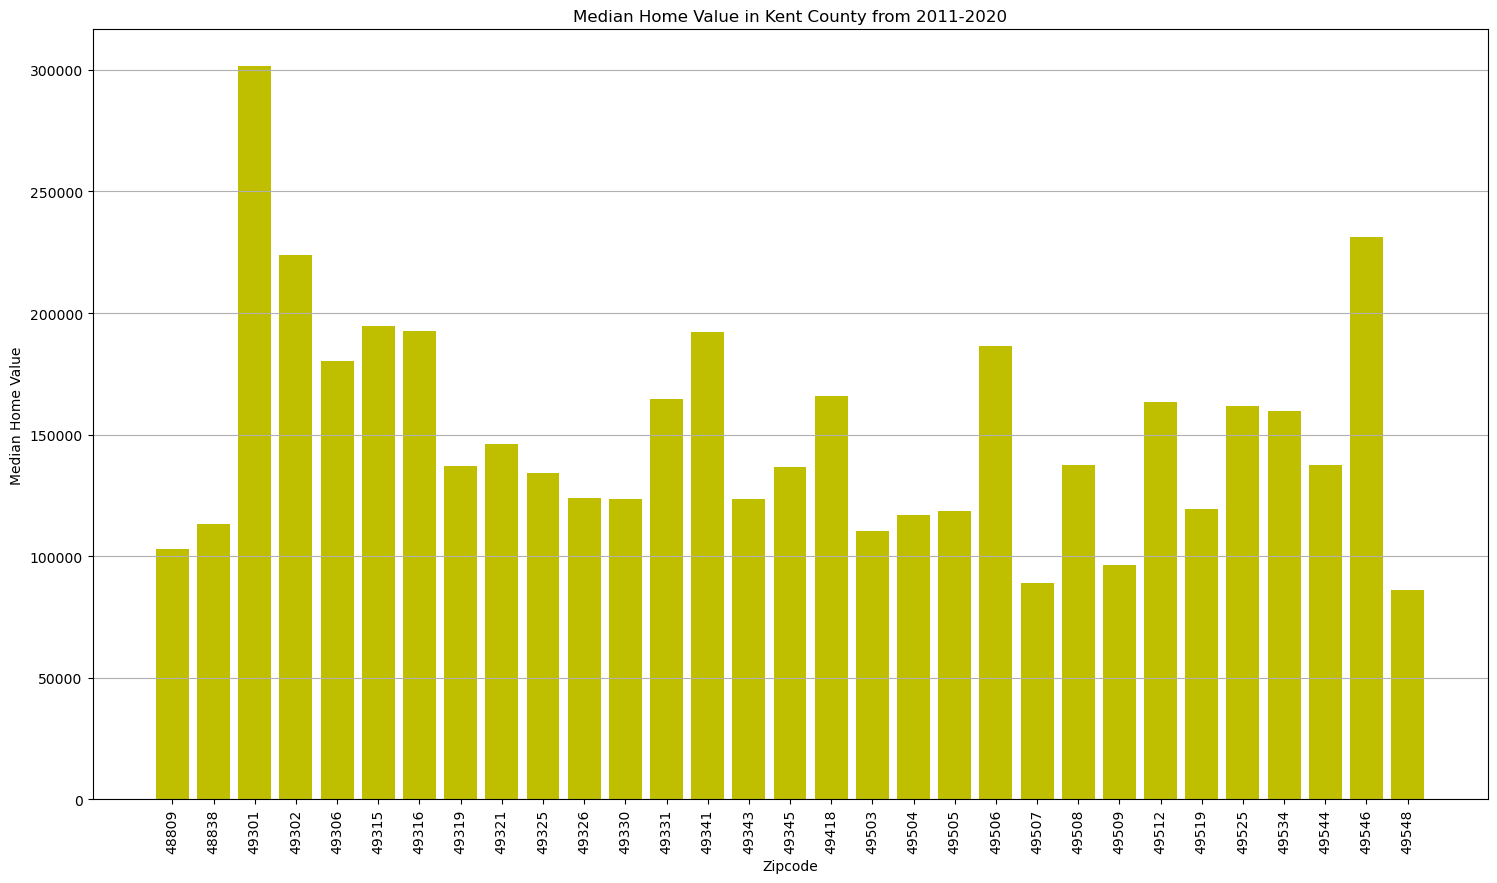

<Figure size 640x480 with 0 Axes>

In [18]:
# Kent

fig = plt.figure(figsize = (18,10))
xaxis = np.arange(0,len(kent_grouped.index))
label = (kent_grouped.index.tolist())
line1 = plt.bar(xaxis,kent_grouped["Median Home Value"],color='y',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)

plt.xlabel("Zipcode")
plt.ylabel("Median Home Value")
plt.title("Median Home Value in Kent County from 2011-2020")


plt.xticks(rotation = 90);
plt.grid(axis = 'y')

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/kent_cty_home_values.png")

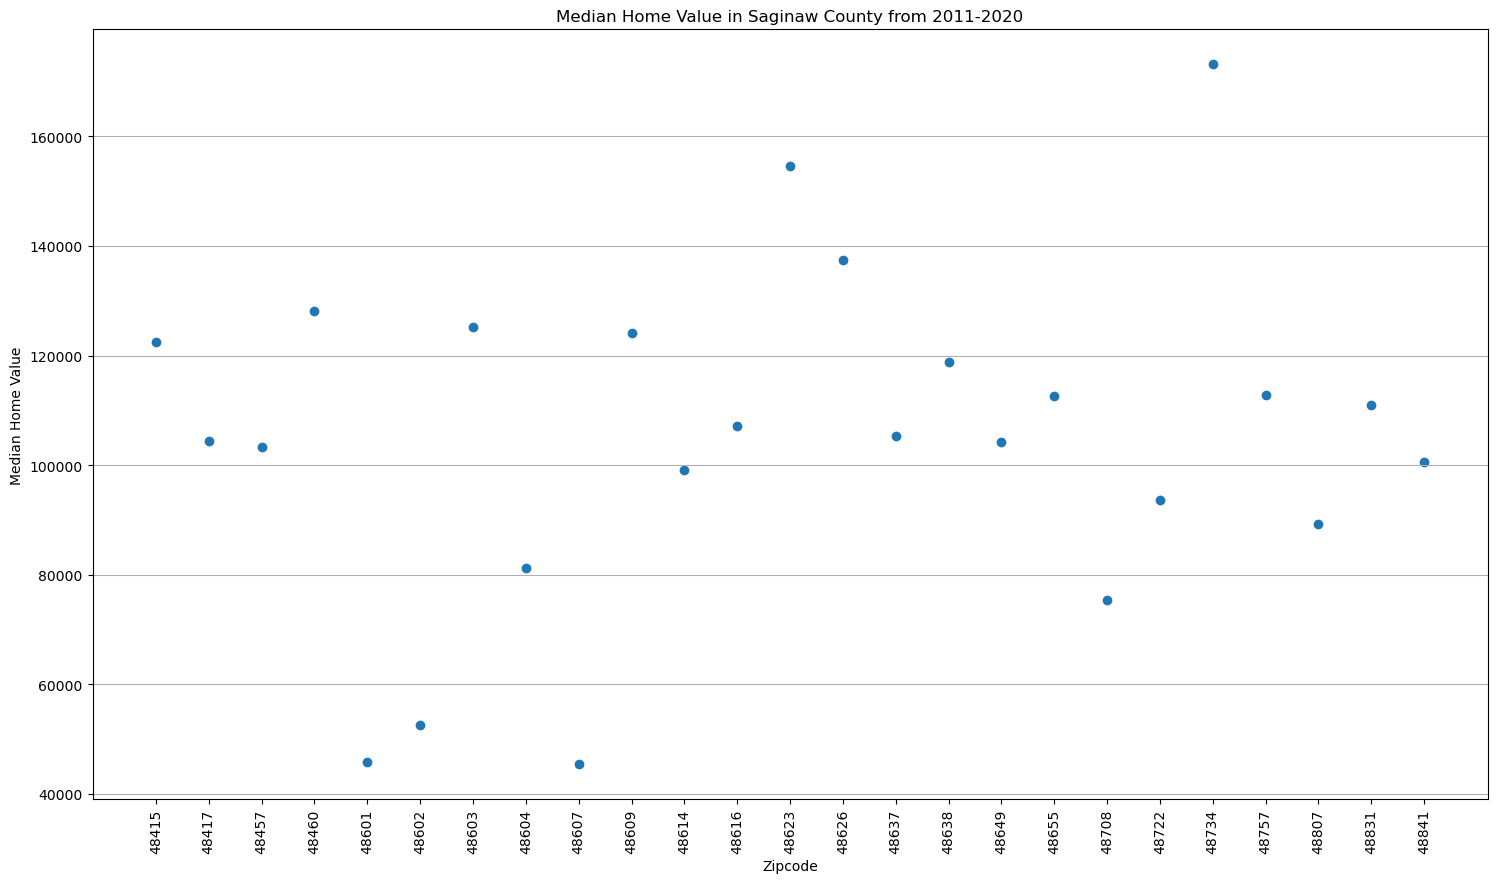

<Figure size 640x480 with 0 Axes>

In [26]:
# Create scatter plot(s) for Home Values in each county
# Saginaw

fig = plt.figure(figsize = (18,10))
xaxis = np.arange(0,len(saginaw_grouped.index))
label = (saginaw_grouped.index.tolist())
line1 = plt.scatter(xaxis,saginaw_grouped["Median Home Value"],label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)

plt.xlabel("Zipcode")
plt.ylabel("Median Home Value")
plt.title("Median Home Value in Saginaw County from 2011-2020")


plt.xticks(rotation = 90);
plt.grid(axis = 'y')

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/saginaw_cty_home_values.png")

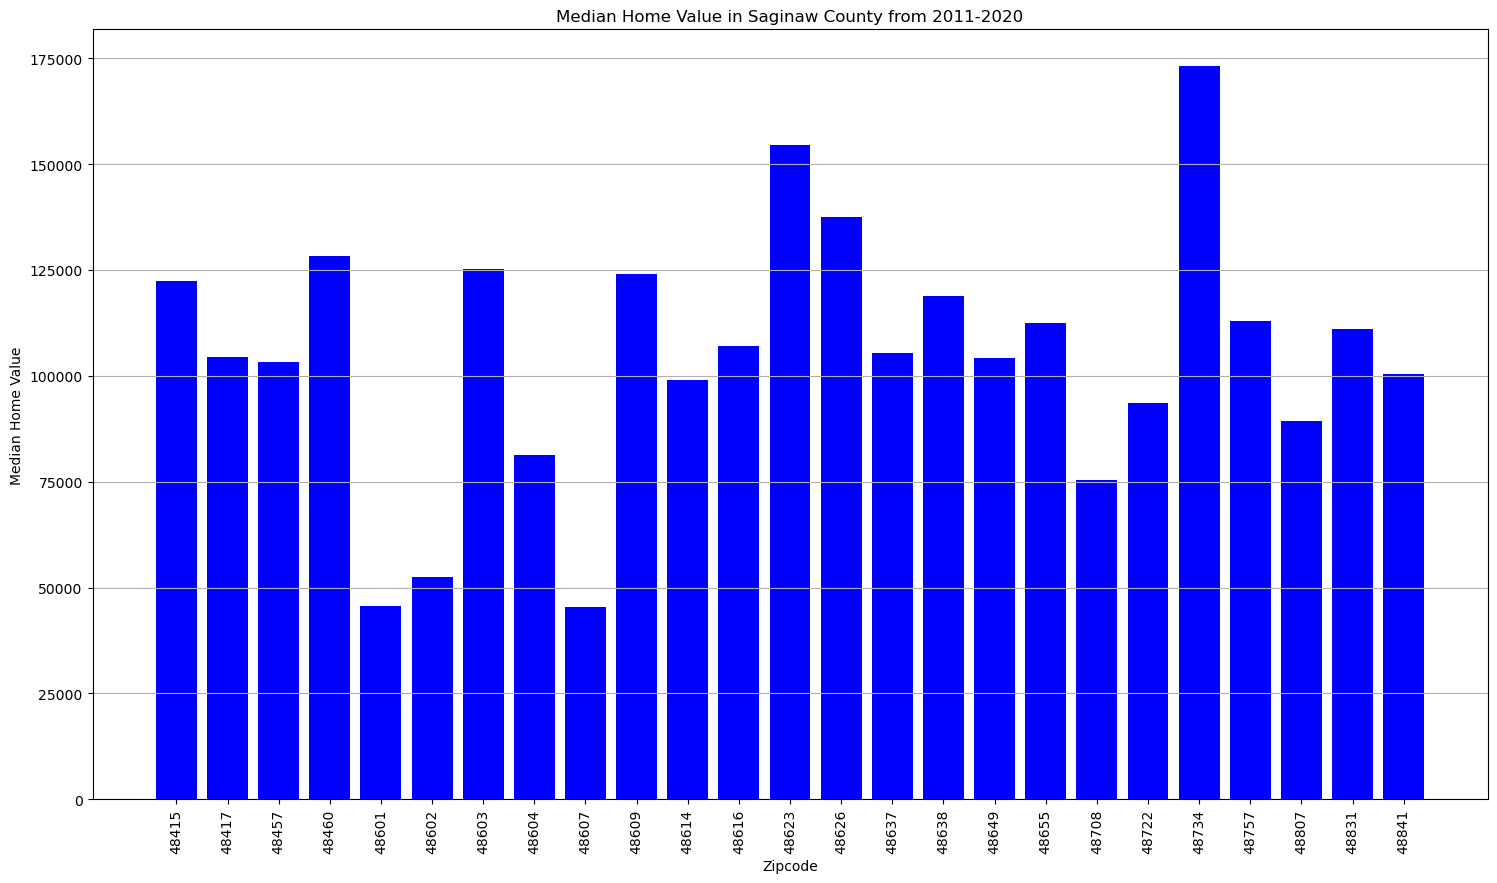

<Figure size 640x480 with 0 Axes>

In [28]:
# Kent

fig = plt.figure(figsize = (18,10))
xaxis = np.arange(0,len(saginaw_grouped.index))
label = (saginaw_grouped.index.tolist())
line1 = plt.bar(xaxis,saginaw_grouped["Median Home Value"],color='b',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)

plt.xlabel("Zipcode")
plt.ylabel("Median Home Value")
plt.title("Median Home Value in Saginaw County from 2011-2020")


plt.xticks(rotation = 90);
plt.grid(axis = 'y')

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/saginaw2_cty_home_values.png")

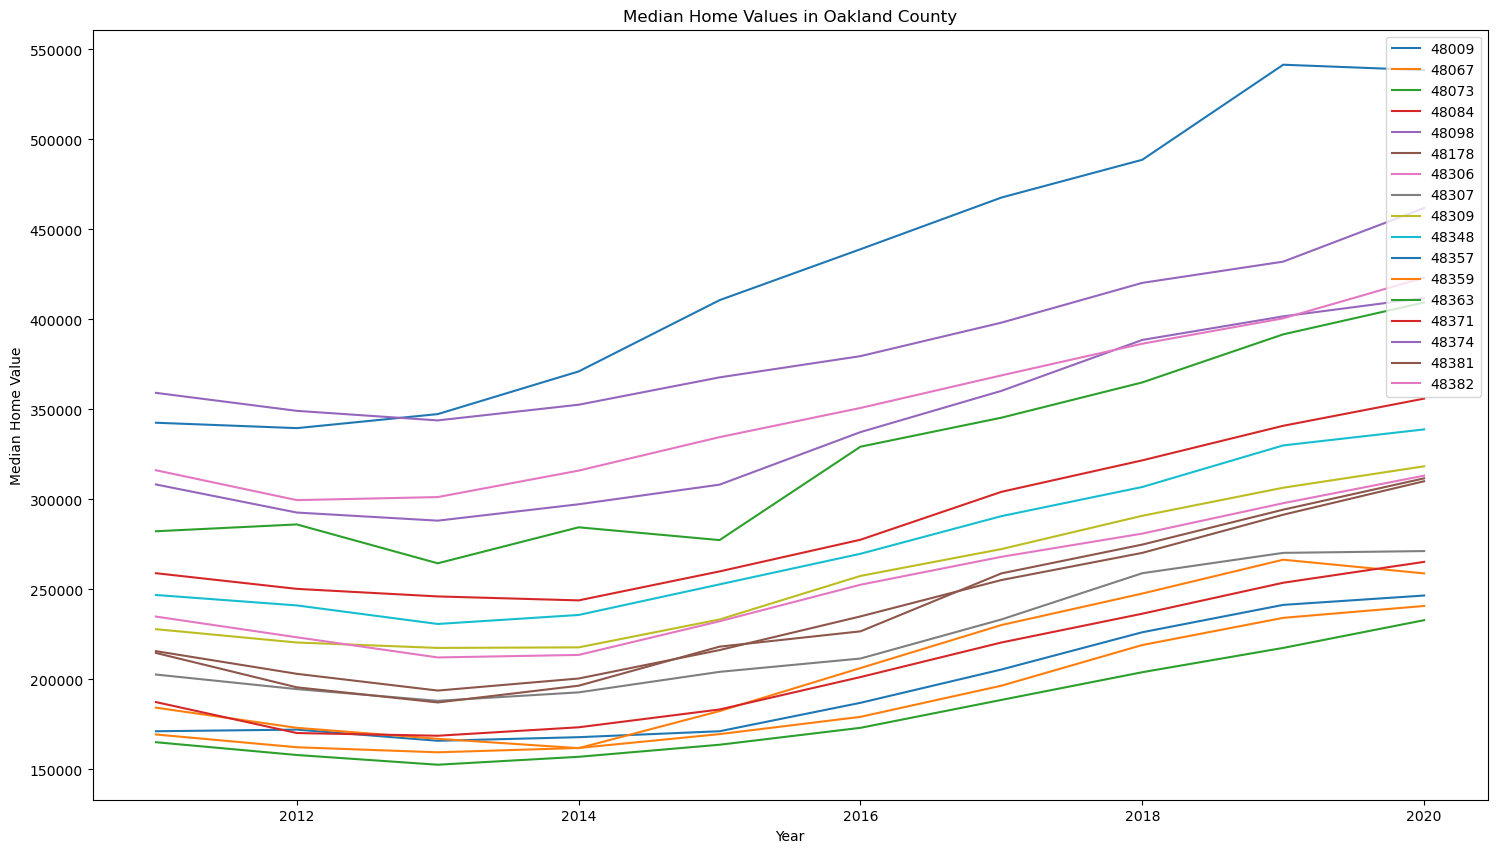

<Figure size 640x480 with 0 Axes>

In [40]:
# Calculate the linear regression and correlation for Oakland County

fig = plt.figure(figsize = (18,10))

# Blank lists for different values
r_values2=[]
zipcodes2=[]
slopes2=[]
y_ints2= []

# Calculate regression equations for all zipcodes
for zipcode in oakland_data["Zipcode"].unique():
    filtered = oakland_data.loc[oakland_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Median Home Value"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values2.append(plt_r)
    zipcodes2.append(zipcode)
    slopes2.append(plt_slope)
    y_ints2.append(plt_int)

# Limit the number of zipcodes to those with the most change and plot those
equations2_df = pd.DataFrame({"Zipcode":zipcodes2,"R":r_values2,"Slope":slopes2,"Y-intercept":y_ints2})
equations2_df = equations2_df.loc[(abs(equations2_df["R"]) > .9) & (abs(equations2_df["Slope"])> 50)]
equations2_df = pd.merge(equations2_df,oakland_data,on="Zipcode",how="left")
equations2_df = equations2_df.sort_values(by=["Zipcode","Year"])

# equations_df
ann = 4000

for zipcode in equations2_df["Zipcode"].unique():
    filtered_list = equations2_df.loc[equations2_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Median Home Value"]
    plt.plot(x,y)
    plt.legend(equations2_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 200
    
plt.title("Median Home Values in Oakland County")
plt.xlabel("Year")
plt.ylabel("Median Home Value")

plt.show()
plt.savefig("output_data/Oakland_home_value_linregress.png")

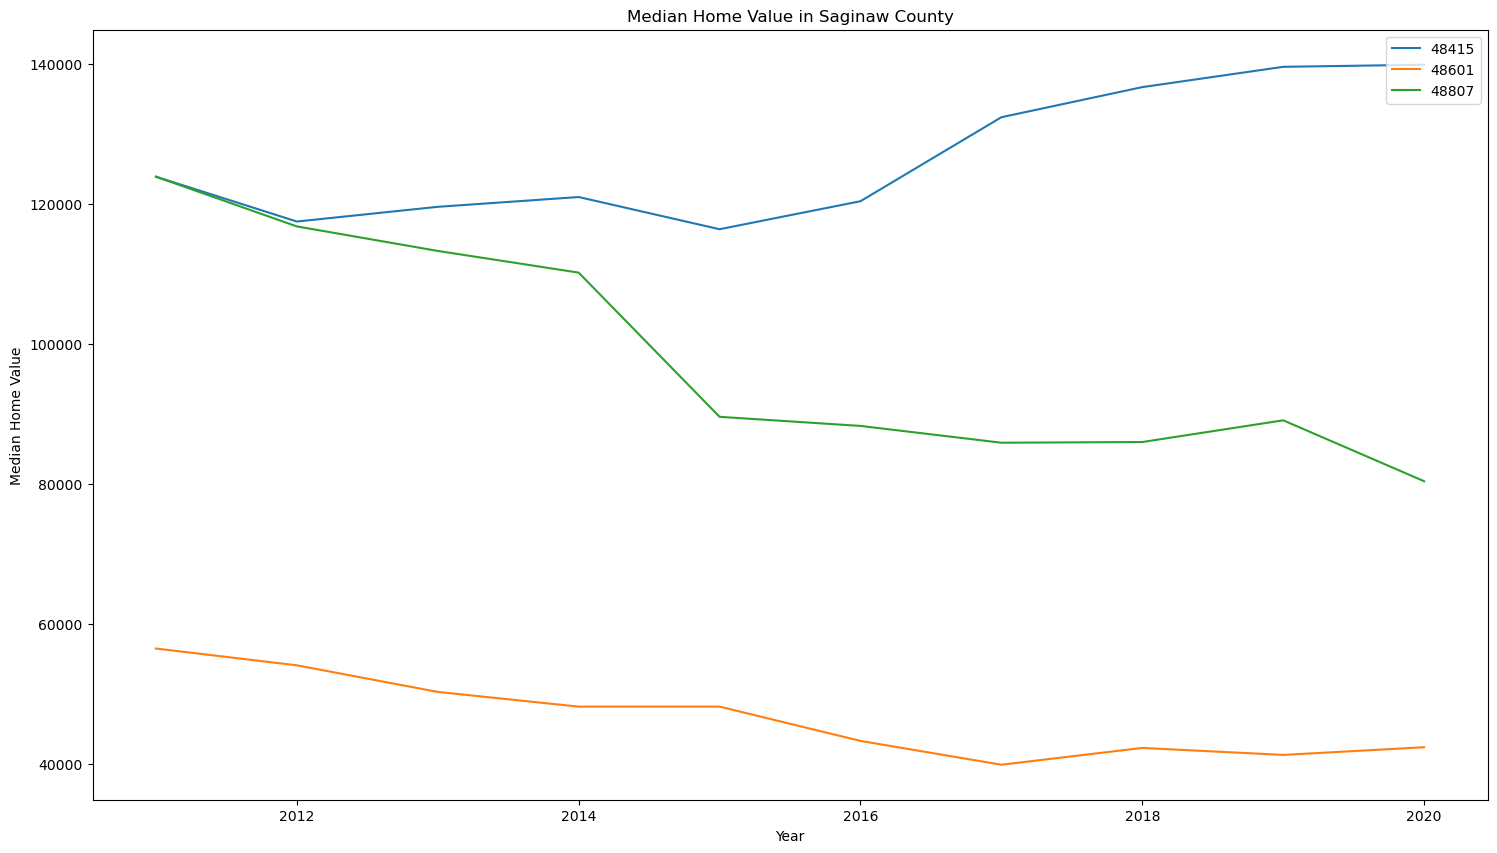

In [41]:
# Regression calculations for Saginaw county

fig = plt.figure(figsize = (18,10))

# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []

# Calculate regression equations for all zipcodes
for zipcode in saginaw_data["Zipcode"].unique():
    filtered = saginaw_data.loc[saginaw_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Median Home Value"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
    
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .8) & (abs(equations_df["Slope"])> 80)]
equations_df = pd.merge(equations_df,saginaw_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 27500

for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Median Home Value"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1200
plt.title("Median Home Value in Saginaw County")
plt.xlabel("Year")
plt.ylabel("Median Home Value")

plt.show()
#plt.savefig("output_data/Saginaw_home_value_linregress.png")

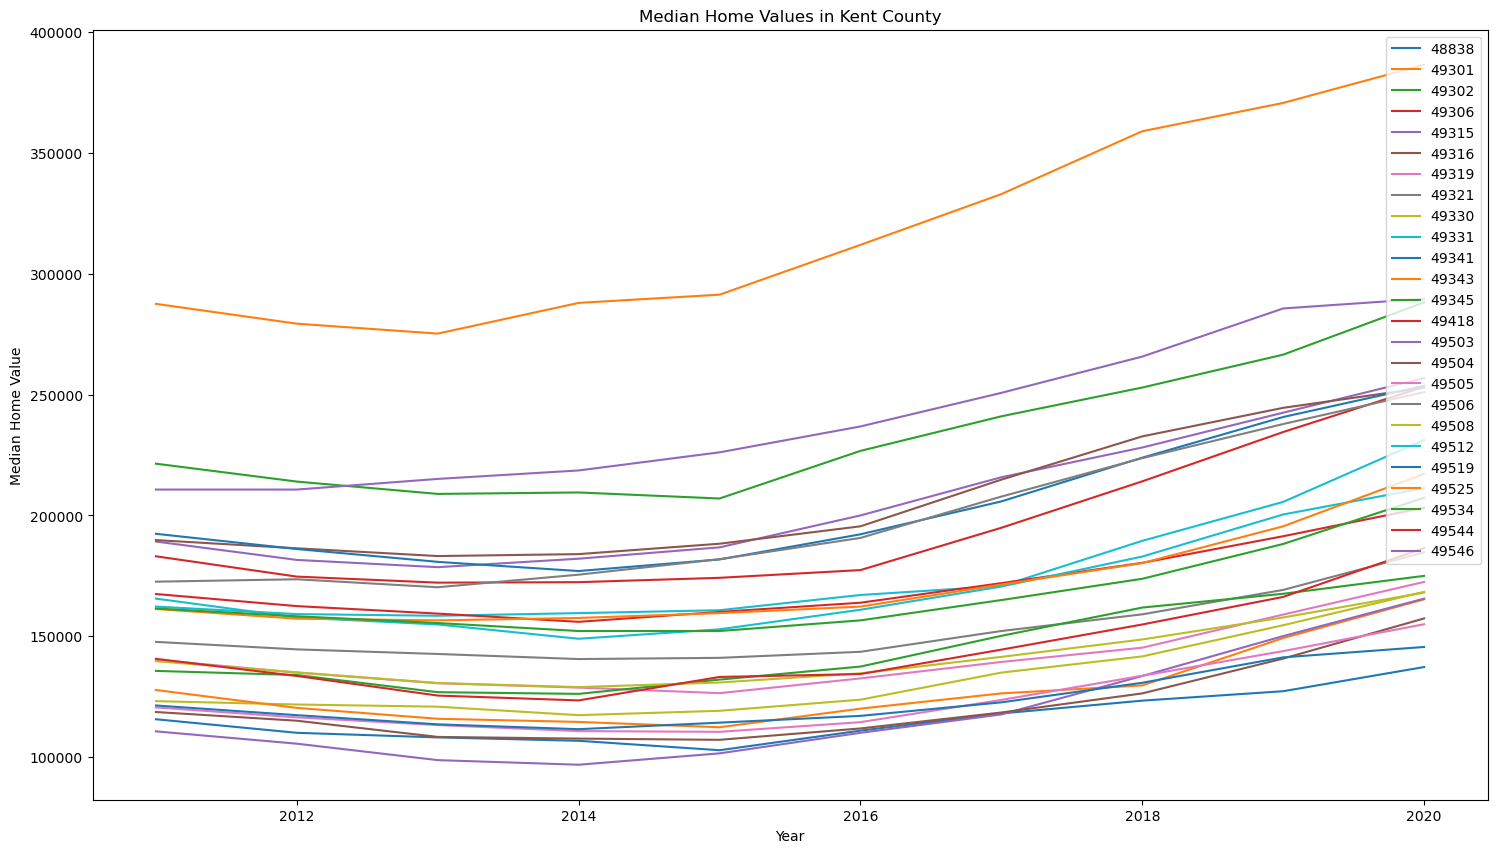

In [42]:
# Regression calculations for Kent county

fig = plt.figure(figsize = (18,10))

# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []

# Calculate regression equations for all zipcodes
for zipcode in kent_data["Zipcode"].unique():
    filtered = kent_data.loc[kent_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Median Home Value"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
    
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> 400)]
equations_df = pd.merge(equations_df,kent_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 27500

for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Median Home Value"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1200
    
plt.title("Median Home Values in Kent County")
plt.xlabel("Year")
plt.ylabel("Median Home Value")

plt.show()
#plt.savefig("output_data/Kent_home_value_linregress.png")

In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph

# Rent Prices in Each County, by Zipcode **Stephanie**

In [ ]:
# Create scatter plot(s) for Rent Prices in each county


In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph


# Demographic Composition in Each County, by Zipcode **Rhi**

In [ ]:
# Create histogram for population distribution across zipcodes
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(311)
ax1.hist(oakland_data["Total Population"],color="green")
ax2 = fig.add_subplot(312,sharex=ax1, sharey=ax1)
ax2.hist(saginaw_data["Total Population"],color="blue")
ax3 = fig.add_subplot(313,sharex=ax1, sharey=ax1)
ax3.hist(kent_data["Total Population"],color="red")
ax1.text(.5,140,"Oakland County Population")
ax2.text(.5,140,"Saginaw County Population")
ax3.text(.5,140,"Kent County Population")
for ax in fig.get_axes():
    ax.set(xlabel="Population",ylabel="Count")
    ax.label_outer()
fig.suptitle("Population counts across zipcodes")
plt.show()

In [ ]:
# Stacked bar chart for population by county

fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(oakland_grouped.index))
label = (oakland_grouped.index.tolist())
line1 = plt.bar(xaxis,oakland_grouped["White Population"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(oakland_grouped["Total Population"]-oakland_grouped["Black Population"]-oakland_grouped["White Population"]),
                       label=label,bottom=oakland_grouped["White Population"],color='r')
line2 = plt.bar(xaxis,oakland_grouped["Black Population"],label=label,bottom=oakland_grouped["White Population"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Population")
plt.title("Median Populations in Oakland County from 2011-2020")
plt.show()
##SAVE CHART


In [ ]:
# Stacked bar chart for poverty rates
fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(oakland_grouped.index))
label = (oakland_grouped.index.tolist())
line1 = plt.bar(xaxis,oakland_grouped["Poverty Count - White"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(oakland_grouped["Poverty Count"]-oakland_grouped["Poverty Count - Black"]-oakland_grouped["Poverty Count - White"]),
                       label=label,bottom=oakland_grouped["Poverty Count - White"],color='r')
line2 = plt.bar(xaxis,oakland_grouped["Poverty Count - Black"],label=label,bottom=oakland_grouped["Poverty Count - White"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Individuals in Poverty")
plt.title("Median Poverty Counts in Oakland County from 2011-2020")
plt.show()


In [ ]:
def time_analyses_stacked(df,col1,col2,col_total,labels,county):
    for zipcode in df["Zipcode"].unique():
        max_y = 1.1*(df[col_total].max())
        filtered = df.loc[df["Zipcode"] == zipcode]
        filtered = filtered.sort_values(by=["Zipcode","Year"])
        filtered["Other"] = filtered[col_total]-filtered[col1]-filtered[col2]
        
        fig = plt.figure(figsize = (15,8))
        line1 = plt.bar(filtered["Year"],filtered[col2],color='c')
        line3 = plt.bar(filtered["Year"],filtered["Other"],bottom=filtered[col2],color='r')
        line2 = plt.bar(filtered["Year"],filtered[col1],bottom=filtered[col2],color='b')
        plt.legend([line1, line2,line3],labels)
        plt.xlabel("Year")
        plt.ylabel(col_total)
        ax.set(ylim = [0, max_y])
        plt.title(col_total + " in "  + str(zipcode) + ", " + county + " County from 2011-2020")
        plt.show()

In [ ]:
# Time analyses for poverty
fig = plt.figure(figsize = (7,4))
time_analyses_stacked(oakland_data,"Poverty Count - White","Poverty Count - Black", 
                      "Poverty Count",["White","Black","Other"],"Oakland")

In [ ]:
# Time analyses for population
time_analyses_stacked(oakland_data,"White Population","Black Population", 
                      "Total Population",["White","Black","Other"],"Oakland")

In [ ]:
# Create initial plot
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in oakland_data["Zipcode"].unique():
    filtered = oakland_data.loc[oakland_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Total Population"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> 300)]
equations_df = pd.merge(equations_df,oakland_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 34000
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Total Population"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1200
plt.title("Population in Oakland County")
plt.xlabel("Year")
plt.ylabel("Individuals")
plt.show()

In [ ]:
# Create initial plot
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values2=[]
zipcodes2=[]
slopes2=[]
y_ints2= []
# Calculate regression equations for all zipcodes
for zipcode in oakland_data["Zipcode"].unique():
    filtered = oakland_data.loc[oakland_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Poverty Count"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values2.append(plt_r)
    zipcodes2.append(zipcode)
    slopes2.append(plt_slope)
    y_ints2.append(plt_int)

# Limit the number of zipcodes to those with the most change and plot those
equations2_df = pd.DataFrame({"Zipcode":zipcodes2,"R":r_values2,"Slope":slopes2,"Y-intercept":y_ints2})
equations2_df = equations2_df.loc[(abs(equations2_df["R"]) > .9) & (abs(equations2_df["Slope"])> 50)]
equations2_df = pd.merge(equations2_df,oakland_data,on="Zipcode",how="left")
equations2_df = equations2_df.sort_values(by=["Zipcode","Year"])
# equations_df
ann = 4000
for zipcode in equations2_df["Zipcode"].unique():
    filtered_list = equations2_df.loc[equations2_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Poverty Count"]
    plt.plot(x,y)
    plt.legend(equations2_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 200
plt.title("Poverty Rates in Oakland County")
plt.xlabel("Year")
plt.ylabel("Individuals in Poverty")
plt.show()

In [ ]:
# Create initial plot
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in oakland_data["Zipcode"].unique():
    filtered = oakland_data.loc[oakland_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["% Unemployed"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> .75)]
equations_df = pd.merge(equations_df,oakland_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 8
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["% Unemployed"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1
plt.title("Unemployment Rate in Oakland County")
plt.xlabel("Year")
plt.ylabel("% Unemployed")
plt.show()

Kent County Analyses

In [ ]:
# Stacked bar chart for population by county

fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(kent_grouped.index))
label = (kent_grouped.index.tolist())
line1 = plt.bar(xaxis,kent_grouped["White Population"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(kent_grouped["Total Population"]-kent_grouped["Black Population"]-kent_grouped["White Population"]),
                       label=label,bottom=kent_grouped["White Population"],color='r')
line2 = plt.bar(xaxis,kent_grouped["Black Population"],label=label,bottom=kent_grouped["White Population"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Population")
plt.title("Median Populations in Kent County from 2011-2020")
plt.show()
##SAVE CHART

In [ ]:
# Stacked bar chart for poverty rates
fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(kent_grouped.index))
label = (kent_grouped.index.tolist())
line1 = plt.bar(xaxis,kent_grouped["Poverty Count - White"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(kent_grouped["Poverty Count"]-kent_grouped["Poverty Count - Black"]-kent_grouped["Poverty Count - White"]),
                       label=label,bottom=kent_grouped["Poverty Count - White"],color='r')
line2 = plt.bar(xaxis,kent_grouped["Poverty Count - Black"],label=label,bottom=kent_grouped["Poverty Count - White"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Individuals in Poverty")
plt.title("Median Poverty Counts in Kent County from 2011-2020")
plt.show()

In [ ]:
# Time analyses for poverty
fig = plt.figure(figsize = (7,4))
time_analyses_stacked(kent_data,"Poverty Count - White","Poverty Count - Black", 
                      "Poverty Count",["White","Black","Other"],"Kent")

In [ ]:
# Time analyses for population
time_analyses_stacked(kent_data,"White Population","Black Population", 
                      "Total Population",["White","Black","Other"],"Kent")

In [ ]:
# Create initial plot ---Population
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in kent_data["Zipcode"].unique():
    filtered = kent_data.loc[kent_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Total Population"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> 400)]
equations_df = pd.merge(equations_df,kent_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 27500
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Total Population"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1200
plt.title("Population in Kent County")
plt.xlabel("Year")
plt.ylabel("Individuals")
plt.show()

In [ ]:
# Create initial plot ---Poverty
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values2=[]
zipcodes2=[]
slopes2=[]
y_ints2= []
# Calculate regression equations for all zipcodes
for zipcode in kent_data["Zipcode"].unique():
    filtered = kent_data.loc[kent_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Poverty Count"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values2.append(plt_r)
    zipcodes2.append(zipcode)
    slopes2.append(plt_slope)
    y_ints2.append(plt_int)

# Limit the number of zipcodes to those with the most change and plot those
equations2_df = pd.DataFrame({"Zipcode":zipcodes2,"R":r_values2,"Slope":slopes2,"Y-intercept":y_ints2})
equations2_df = equations2_df.loc[(abs(equations2_df["R"]) > .85) & (abs(equations2_df["Slope"])> 40)]
equations2_df = pd.merge(equations2_df,kent_data,on="Zipcode",how="left")
equations2_df = equations2_df.sort_values(by=["Zipcode","Year"])
# equations_df
ann = 6000
for zipcode in equations2_df["Zipcode"].unique():
    filtered_list = equations2_df.loc[equations2_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Poverty Count"]
    plt.plot(x,y)
    plt.legend(equations2_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 350
plt.title("Poverty Rates in Kent County")
plt.xlabel("Year")
plt.ylabel("Individuals in Poverty")
plt.show()

In [ ]:
# Create initial plot --Unemployment
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in kent_data["Zipcode"].unique():
    filtered = kent_data.loc[kent_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["% Unemployed"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> .58)]
equations_df = pd.merge(equations_df,kent_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 8
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["% Unemployed"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1
plt.title("Unemployment Rate in Kent County")
plt.xlabel("Year")
plt.ylabel("% Unemployed")
plt.show()

Saginaw County Analyses

In [ ]:
# Stacked bar chart for population by county

fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(saginaw_grouped.index))
label = (saginaw_grouped.index.tolist())
line1 = plt.bar(xaxis,saginaw_grouped["White Population"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(saginaw_grouped["Total Population"]-saginaw_grouped["Black Population"]-saginaw_grouped["White Population"]),
                       label=label,bottom=saginaw_grouped["White Population"],color='r')
line2 = plt.bar(xaxis,saginaw_grouped["Black Population"],label=label,bottom=saginaw_grouped["White Population"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Population")
plt.title("Median Populations in Saginaw County from 2011-2020")
plt.show()
##SAVE CHART

In [ ]:
# Stacked bar chart for poverty rates
fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(saginaw_grouped.index))
label = (saginaw_grouped.index.tolist())
line1 = plt.bar(xaxis,saginaw_grouped["Poverty Count - White"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(saginaw_grouped["Poverty Count"]-saginaw_grouped["Poverty Count - Black"]-saginaw_grouped["Poverty Count - White"]),
                       label=label,bottom=saginaw_grouped["Poverty Count - White"],color='r')
line2 = plt.bar(xaxis,saginaw_grouped["Poverty Count - Black"],label=label,bottom=saginaw_grouped["Poverty Count - White"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Individuals in Poverty")
plt.title("Median Poverty Counts in Saginaw County from 2011-2020")
plt.show()

In [ ]:
# Time analyses for poverty
fig = plt.figure(figsize = (7,4))
time_analyses_stacked(saginaw_data,"Poverty Count - White","Poverty Count - Black", 
                      "Poverty Count",["White","Black","Other"],"Saginaw")

In [ ]:
# Time analyses for population
time_analyses_stacked(saginaw_data,"White Population","Black Population", 
                      "Total Population",["White","Black","Other"],"Saginaw")

In [ ]:
# Create initial plot ---Population
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in saginaw_data["Zipcode"].unique():
    filtered = saginaw_data.loc[saginaw_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Total Population"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .8) & (abs(equations_df["Slope"])> 80)]
equations_df = pd.merge(equations_df,saginaw_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 27500
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Total Population"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1200
plt.title("Population in Saginaw County")
plt.xlabel("Year")
plt.ylabel("Individuals")
plt.show()


# Combination Visualizations

# GIF Maps

In [ ]:
# Relocate needed module and import it (install as well)

In [ ]:
# Determine what specific visualizations to convert to map GIFs

In [ ]:
# Create maps by county, showing individual points per zipcode (heat map)

In [ ]:
# Export maps?